# Importacion y Lectura


In [ ]:
# Librerias

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(10,6)}) # establece en un primer momento las dimensiones de los graficos que hagamos.

In [ ]:
# carga del dataset
url = 'https://raw.githubusercontent.com/alefreguglia/DataScience_projects/main/sysarmy_2020_renamed.csv'
df = pd.read_csv(url, index_col=0)
df.head(6)


,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.0,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.0,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digita

In [ ]:
# visualizacion de columnas
df.columns

Index(['perfil_genero', 'perfil_edad', 'trabajo_pais', 'trabajo_provincia',
       'perfil_anos_experiencia', 'trabajo_anios_empresa_actual',
       'trabajo_anios_puesto_actual', 'trabajo_personas_a_cargo',
       'perfil_nivel_estudios', 'perfil_estado_estudios', 'perfil_carrera',
       'perfil_universidad', 'perfil_cursos_especializacion',
       'perfil_contribuciones_open_source', 'perfil_programa_como_hobbie',
       'trabajo_rol', 'herramientas_plataforma',
       'herramientas_languagjs_programacion', 'herramientas_frameworks',
       'herramientas_data_bases', 'herramientas_qa_testing',
       'herramientas_IDEs', 'herramientas_sistema_operativo_pc',
       'herramientas_sistema_operativo_cel', 'trabajo_guardias ',
       'salario_guardias_pago', 'trabajo_guardias_tipo_pago ',
       'trabajo_tipo_contrato', 'salario_mensual_BRUTO',
       'salario_mensual_NETO', 'salario_salario_dolares',
       'salario_conformidad_sueldo',
       'salario_comparacion_sueldo_semestre_anteri

# Visualizacion

## Tablas

In [ ]:
# Tabla Salario mensual neto, agrupada por nivel de estudio
df[["perfil_nivel_estudios", "salario_mensual_NETO"]].groupby("perfil_nivel_estudios").mean()

,salario_mensual_NETO
perfil_nivel_estudios,
Doctorado,91629.115517
Posdoctorado,529875.000000
Posgrado,124166.795300
Primario,87500.000000
Secundario,82686.351857
Terciario,80814.433784
Universitario,97410.224414


## Graficos de barras

In [ ]:
# Cantidad de respuestas por categoria (nivel de estudio)
df["perfil_nivel_estudios"].value_counts()

Universitario    4133
Terciario        1135
Secundario        449
Posgrado          342
Doctorado          30
Posdoctorado        4
Primario            2
Name: perfil_nivel_estudios, dtype: int64

1) Realizar un grafico de barras en donde se visualice la cantidad de respuestas (eje y) por cada categoria

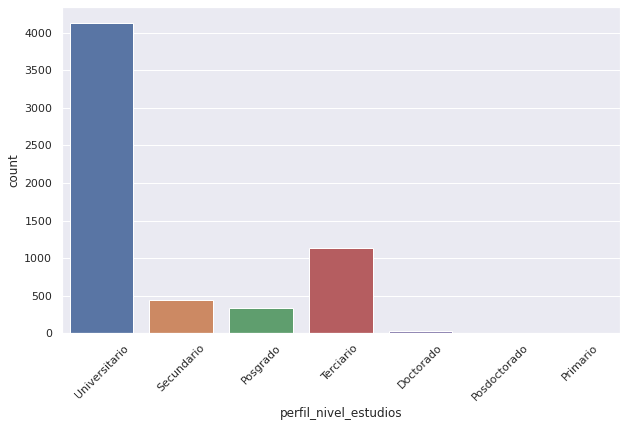

In [ ]:
# Grafico de barra
sns.countplot(data=df, x='perfil_nivel_estudios')
plt.xticks(rotation=45); #mueve los ticks del eje X en 45°

2) Visualizar el salario mensual neto (promedio) de cada categoria

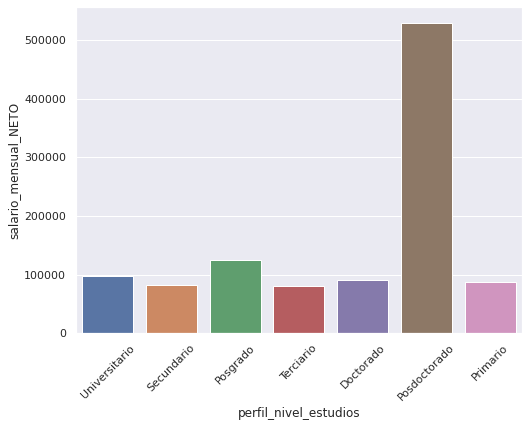

In [ ]:
# Salarios promedios por nivel de estudio
fig = plt.figure(figsize=(8,6))
sns.barplot(data=df,
                y="salario_mensual_NETO", x='perfil_nivel_estudios',
                estimator=np.mean, ci=None) # usa el promedio para el estimador # indicamos q no muestre el indicador de confianza
plt.xticks(rotation=45);

3) Desglozar cada categoria para identificar el estado del nivel de estudio y su salario mensual neto correspondiente (promedio)

In [ ]:
df["perfil_estado_estudios"].unique()

array(['En curso', 'Completado', 'Incompleto'], dtype=object)

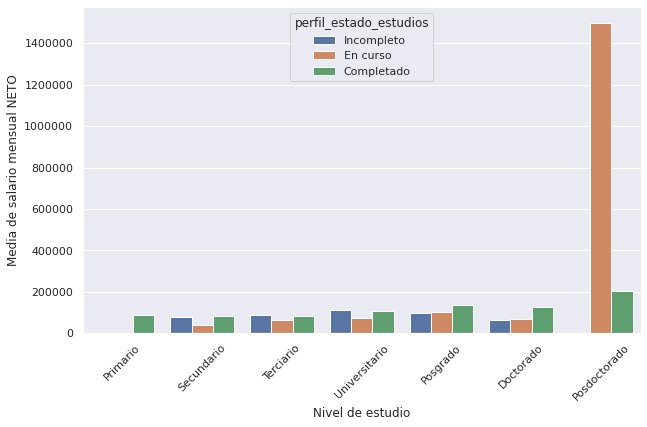

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
orden = ['Primario', 'Secundario', 'Terciario', 
         'Universitario', 'Posgrado',  'Doctorado', 'Posdoctorado'] # orden para mostrar en x
hue_orden = ['Incompleto', 'En curso', 'Completado'] # Sub categoria, el estado de cada categoria de estudio
sns.barplot(y=df["salario_mensual_NETO"], x=df['perfil_nivel_estudios'],
                estimator=np.mean, ci=None,
                hue=df["perfil_estado_estudios"],
                order=orden, hue_order=hue_orden
                )
plt.xticks(rotation=45)
plt.ylabel("Media de salario mensual NETO")
plt.xlabel("Nivel de estudio")
plt.ticklabel_format(style='plain', axis='y') # lo formatea para evitar que salga connotacion cientifica

## Graficos de lineas

1) Visualizar el salario mensual neto (eje Y) segun la edad (eje x)
La linea continua, muestra el promedio y el margen sombreado la amplitud de valores.
No se consideran las respuestas de edad mayor a 100

In [ ]:
# Antes verificar los valores extremos de la variable "Edad" 
print("Rango: ", df["perfil_edad"].min(), df["perfil_edad"].max())

Rango:  18 52000


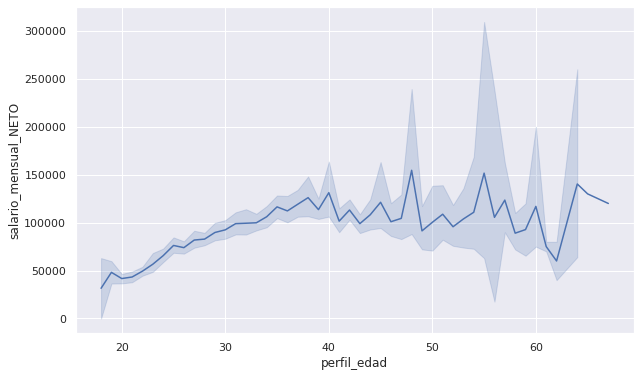

In [ ]:
# Realizar el grafico, quitando los valores irreales
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data=df[df['perfil_edad'] < 100], # filtra el df para quitar los datos que pueden tener algun error
                 x='perfil_edad', y='salario_mensual_NETO');

## Histogramas

1) Histograma por edad


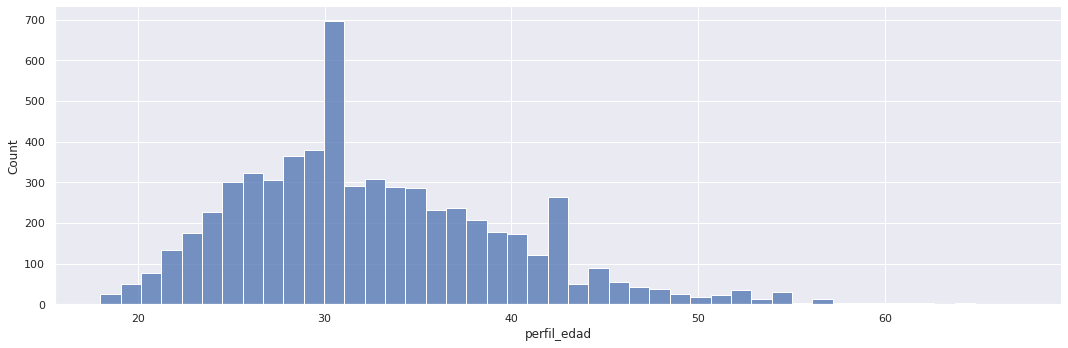

In [ ]:
#Gráfico del histograma de frecuencias.
sns.displot(df[df["perfil_edad"]<=100]["perfil_edad"], aspect=3) #aspect es para setear el tamaño del grafico
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

2) Histograma que permita visualizar la cantidad de respuestas (eje y) de cada salario mensual

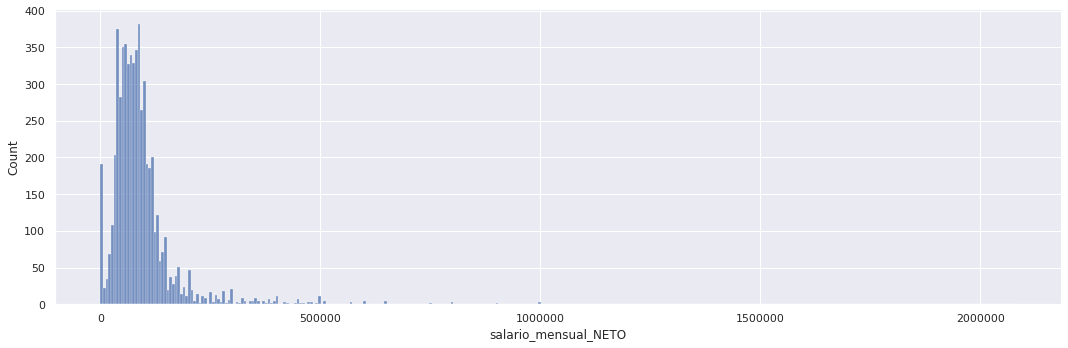

In [ ]:
sns.displot(df["salario_mensual_NETO"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

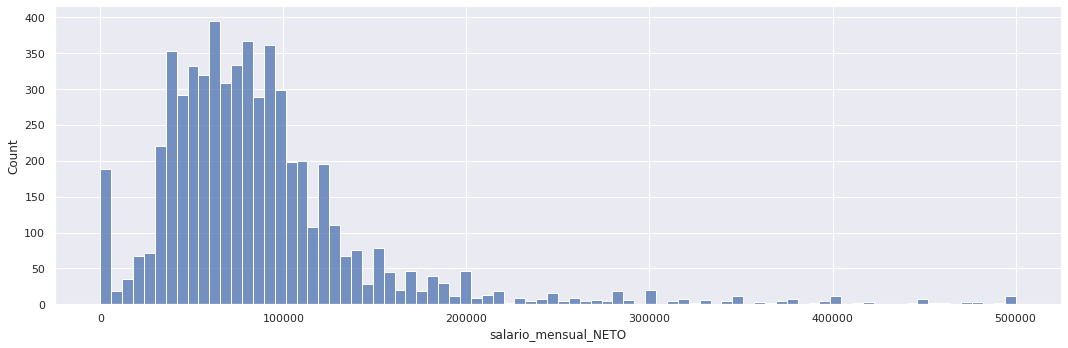

In [ ]:
# Volvemos a graficar limitando los valores de la columna 'salario_mensual_NETO'
sns.displot(df[df["salario_mensual_NETO"]<=500000]["salario_mensual_NETO"], aspect=3) #aspect es para setear el tamaño del grafico
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

## Mapa de calor

Visualizar la cantidad de respuestas de cada categoria, segun el género

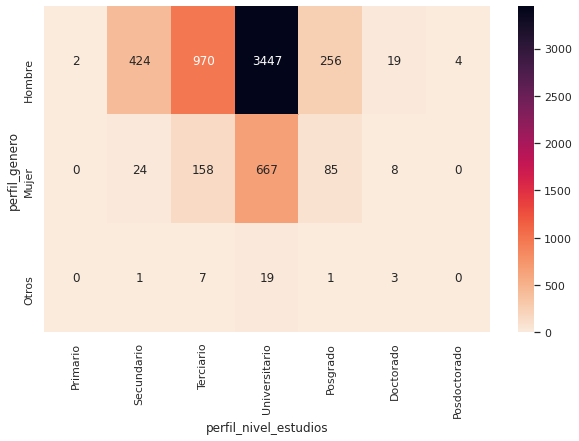

In [ ]:
orden = ['Primario', 'Secundario', 'Terciario', 
         'Universitario', 'Posgrado',  'Doctorado', 'Posdoctorado']
exp = pd.crosstab(df["perfil_genero"],
                  df["perfil_nivel_estudios"])[orden]
sns.heatmap(exp, annot=True, fmt="d", cmap="rocket_r"); # el exp es para indicarle que quiero graficar # el fmt para q lo muestre en decimal  # cmap es la paleta de colores

## Tabla Cruzada

In [ ]:
# Visualizarlo a traves de tabla cruzada
pd.crosstab(df["perfil_genero"],
                  df["perfil_nivel_estudios"])[orden]

perfil_nivel_estudios,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
perfil_genero,,,,,,,
Hombre,2,424,970,3447,256,19,4
Mujer,0,24,158,667,85,8,0
Otros,0,1,7,19,1,3,0


## Grafico de Puntos (scatterplots)

# Manejo de valores atípicos

Muestra la relación entre 2 o 3 variables numéricas continuas. Adicionalmente, se puede usar el color y la forma de los puntos para variables categóricas, y el tamaño para una variable numérica extra.

el scatter plot no es una visualización que permite encontrar patrones en los datos ya que los puntos se superponen demasiado.
Ejemplo con la Edad

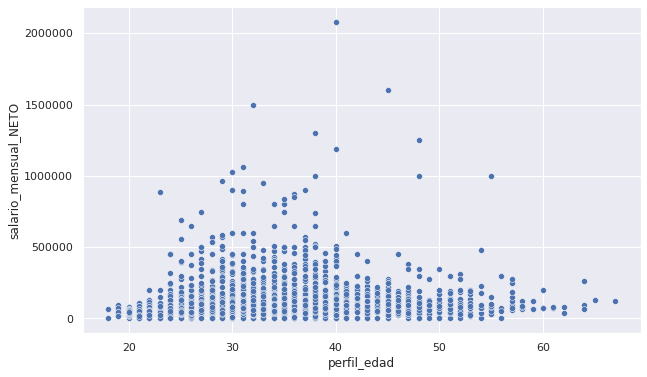

In [ ]:
plt.figure(figsize=(10,6))
edad_max = 100
sns.scatterplot(data=df[df["perfil_edad"] < edad_max],
                    x='perfil_edad', y='salario_mensual_NETO')
plt.ticklabel_format(style='plain', axis='y') # Para evitar la notación científica en las etiquetas

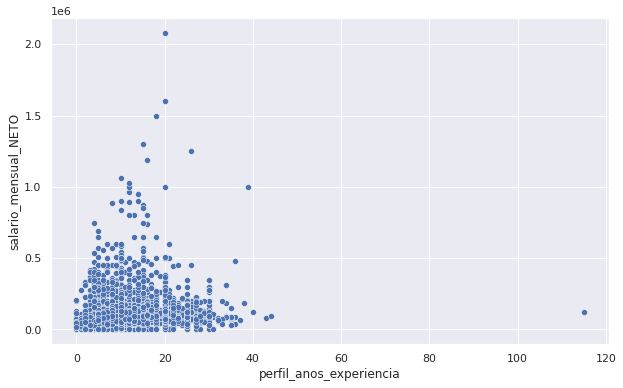

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, #df[(df["salario_mensual_NETO"] < 500000) & (df["perfil_anos_experiencia"] < 50)],
                    x='perfil_anos_experiencia', y='salario_mensual_NETO'
                    # marker=".",
                    # s=10,  # marker size
                )

El poder de los scatterplots radica en que el elemento gráfico usado (el punto) tiene un peso visual muy bajo, y por lo tanto podemos codificar múltiples variables en una misma visualización.
Ejemplo con salario y años de experiencia

False    5419
True      676
Name: salario_en_usd_bool, dtype: int64


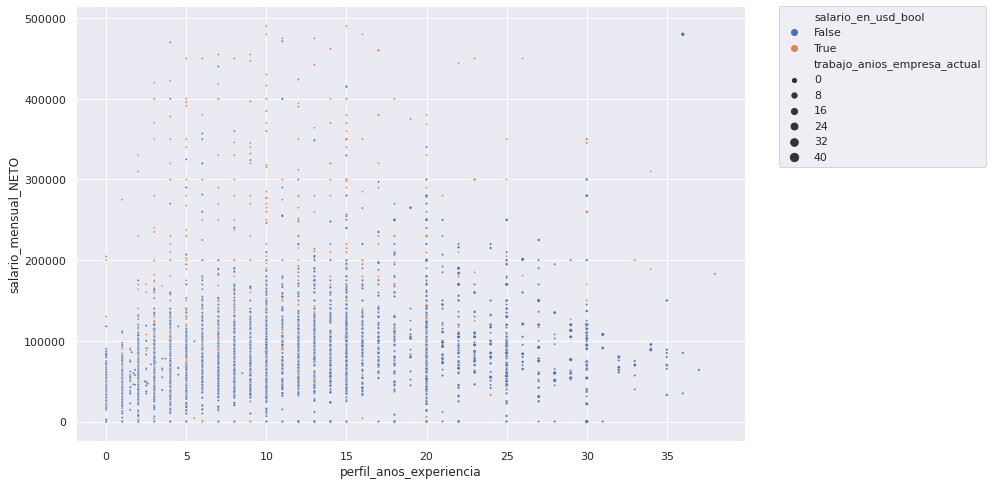

In [ ]:
df['salario_en_usd_bool'] = ~df['salario_salario_dolares'].isna()
print(df['salario_en_usd_bool'].value_counts())

plt.figure(figsize=(12,8))
mask = (df['perfil_anos_experiencia'] < 40) & (df['salario_mensual_NETO'] < 500000)
sns.scatterplot(data=df[mask], #.sample(500), 
                    x='perfil_anos_experiencia', y='salario_mensual_NETO',
                    marker='.',
                    hue='salario_en_usd_bool',
                    size='trabajo_anios_empresa_actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Grafico de Boxplot


El grafico del boxplot, permite  representar gráficamente grupos de datos numéricos a través de sus cuartiles, facilitando la identificacion de valores atipicos.

1) Valores extremos del Salario Mensual neto

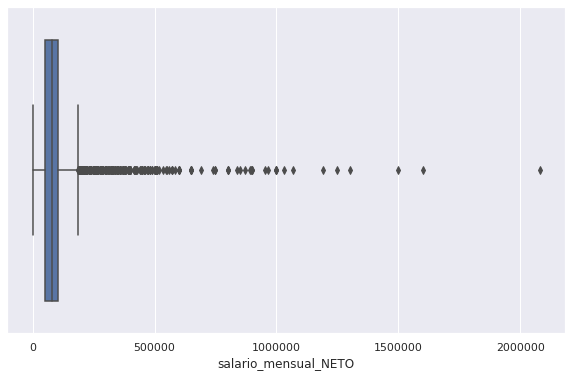

In [ ]:
# Identificacíon de los valores extremos del Salario Neto
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x=df["salario_mensual_NETO"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

2) Valores extremos de la Edad

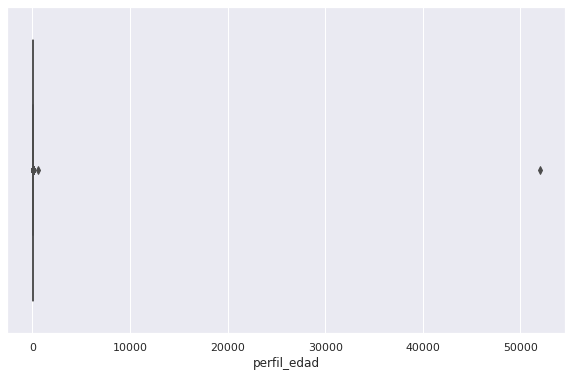

In [ ]:
# Identificar valores extremos de la edad
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x=df["perfil_edad"])

3) Comparar salarios netos con respecto al nivel de estudios alcanzado

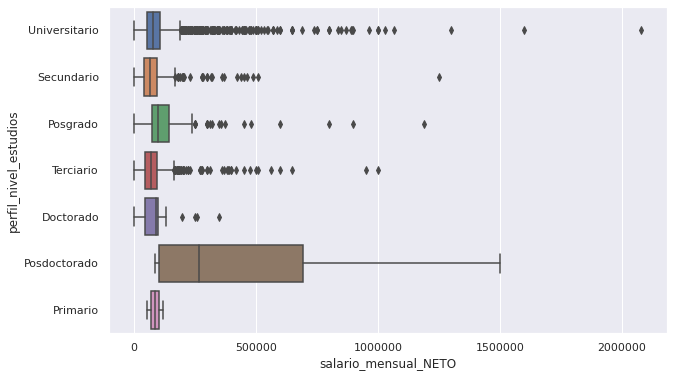

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(data=df, x="salario_mensual_NETO", y='perfil_nivel_estudios')
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

## Eliminacion de outliers

Diferentes métodos de eliminación de outliers

**1) Filtrado en un valor específico:**
Me quedo por ejemplo con edades mayores a 18 y menores a 99.



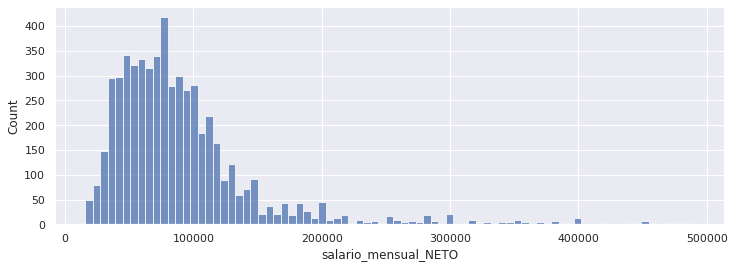

In [ ]:
# Filtrado por un valor constante
df_filtrado = df[(df["salario_mensual_NETO"]<500000) & (df["salario_mensual_NETO"]>15000)] # Podría pensarse en un límite inferior como el salario mínimo
fig = plt.figure(figsize=(12, 4))
sns.histplot(x=df_filtrado['salario_mensual_NETO'])

**2) Rango intercuartílico:**
Punto de datos que queda fuera de 1,5 veces de un rango intercuartil. Ver diagrama de caja.



In [ ]:
# FUNCION de Eliminación de valores atípicos por medio del Rango Intercuartílico
def clean_outliers_q3(dataset, column_name, iqr_factor = 1.5):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (iqr_factor * interesting_col.quantile(.75)))
    return dataset[mask_outlier]


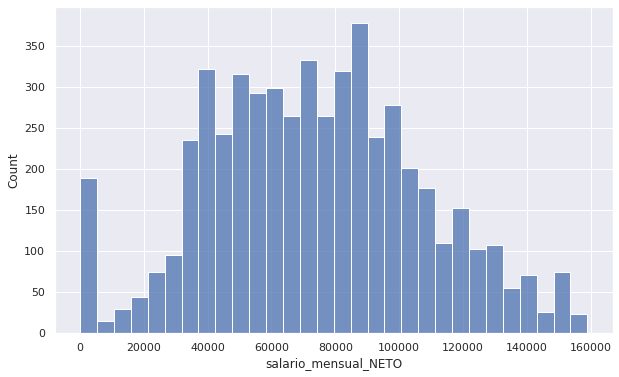

In [ ]:
# Despues de correr la funcion, se corre esto para finalmente eliminar valores atípicos por medio del Rango Intercuartílico
data = clean_outliers_q3(df, 'salario_mensual_NETO', 1.5)['salario_mensual_NETO']
sns.histplot(x=data)

Creacion de un nuevo dataset con las lineas ya eliminadas


In [ ]:
# Detección de outliers con IQR código
# Crear un nuevo df para trabajar con el dataset con lineas eliminadas
# defino los cuantiles 1 (0.25) y 3 (0.75)
q1 = df["salario_mensual_NETO"].quantile(0.25)
q3 = df["salario_mensual_NETO"].quantile(0.75)
# calculo el rango intercuartilico definido como la diferencia en q3-q1
iqr = q3-q1
# calculo cual va a ser el minimo valor que voy a permitir en mi dataset: en general se toma el cuantil 1 MENOS 1.5 veces el el iqr. Por eso 1.5*iqr
minimum  = q1-1.5*iqr
# calculo cual es el máximo valor que voy a permitir en mi dataset (misma metodología que para el mínimo pero sumando)
maximum = q3+1.5*iqr

In [ ]:
#Por último : hago el filtro en mi dataset
df_new = df.loc[(df["salario_mensual_NETO"] > minimum) & (df["salario_mensual_NETO"] < maximum)]

In [ ]:
#Verifico el nuevo tamaño
df_new.shape

(5490, 48)

**3) Desviación estándar:**
Punto de datos que cae fuera de 2,5 desviaciones estándar con respecto a la media, la desviación estándar nos dice "cuánto nos alejamos de la media".

In [ ]:
# FUNCION de Eliminación de valores atípicos por medio de la Desviación estándard
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

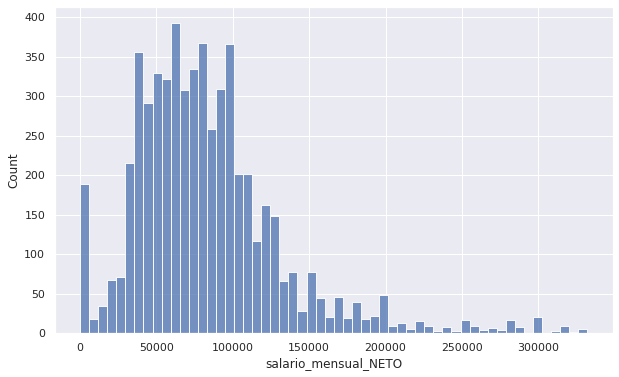

In [ ]:
# Despues de correr la funcion, se corre esto para finalmente eliminar valores atípicos por medio desviacion estandar
data2 = clean_outliers_sd(df, 'salario_mensual_NETO')['salario_mensual_NETO']
sns.histplot(x=data2)

# Manejo de valores faltantes

Identificar los valores faltantes en cada respuesta

In [ ]:
# Cantidad de columnas sin respuestas
df.isnull().sum()

perfil_genero                                       0
perfil_edad                                         0
trabajo_pais                                        0
trabajo_provincia                                   0
perfil_anos_experiencia                             0
trabajo_anios_empresa_actual                        0
trabajo_anios_puesto_actual                         0
trabajo_personas_a_cargo                            0
perfil_nivel_estudios                               0
perfil_estado_estudios                              0
perfil_carrera                                    299
perfil_universidad                                534
perfil_cursos_especializacion                       0
perfil_contribuciones_open_source                   0
perfil_programa_como_hobbie                         0
trabajo_rol                                         0
herramientas_plataforma                             2
herramientas_languagjs_programacion                 1
herramientas_frameworks     

In [ ]:
# Total de valores nulos
df.isnull().sum().sum()

20588

In [ ]:
# En Porcentaje de respuestas
df.isnull().sum()/len(df)*100

perfil_genero                                     0.000000
perfil_edad                                       0.000000
trabajo_pais                                      0.000000
trabajo_provincia                                 0.000000
perfil_anos_experiencia                           0.000000
trabajo_anios_empresa_actual                      0.000000
trabajo_anios_puesto_actual                       0.000000
trabajo_personas_a_cargo                          0.000000
perfil_nivel_estudios                             0.000000
perfil_estado_estudios                            0.000000
perfil_carrera                                    4.905660
perfil_universidad                                8.761280
perfil_cursos_especializacion                     0.000000
perfil_contribuciones_open_source                 0.000000
perfil_programa_como_hobbie                       0.000000
trabajo_rol                                       0.000000
herramientas_plataforma                           0.0328

Existen diferentes opciones para trabajar con los valores faltantes

**1) Eliminar las lineas con valores faltantes (Drop)**

In [ ]:
df2 = df.copy() # hacemos una copia del df para mostrar esto sin modificar nuestro dataset original

In [ ]:
df2.isnull().sum() # verificamos que la suma de nulos sea igual que en df

perfil_genero                                       0
perfil_edad                                         0
trabajo_pais                                        0
trabajo_provincia                                   0
perfil_anos_experiencia                             0
trabajo_anios_empresa_actual                        0
trabajo_anios_puesto_actual                         0
trabajo_personas_a_cargo                            0
perfil_nivel_estudios                               0
perfil_estado_estudios                              0
perfil_carrera                                    299
perfil_universidad                                534
perfil_cursos_especializacion                       0
perfil_contribuciones_open_source                   0
perfil_programa_como_hobbie                         0
trabajo_rol                                         0
herramientas_plataforma                             2
herramientas_languagjs_programacion                 1
herramientas_frameworks     

In [ ]:
# Dropear las lineas
df2.dropna(inplace = True) 

In [ ]:
 #Verificar el nuevo tamaño
df2.shape

(15, 48)

In [ ]:
#Corroborar si aun quedan valores null
df2.isna().sum()

perfil_genero                                    0
perfil_edad                                      0
trabajo_pais                                     0
trabajo_provincia                                0
perfil_anos_experiencia                          0
trabajo_anios_empresa_actual                     0
trabajo_anios_puesto_actual                      0
trabajo_personas_a_cargo                         0
perfil_nivel_estudios                            0
perfil_estado_estudios                           0
perfil_carrera                                   0
perfil_universidad                               0
perfil_cursos_especializacion                    0
perfil_contribuciones_open_source                0
perfil_programa_como_hobbie                      0
trabajo_rol                                      0
herramientas_plataforma                          0
herramientas_languagjs_programacion              0
herramientas_frameworks                          0
herramientas_data_bases        

**2) Imputar por la media o mediana**

Consiste en imputar ese valor por algún valor estadístico
- Ventajas: fácil, rápido y refleja mejor la distribución de la variable. 
- Desventajas: no tiene en cuenta las correlaciones 
entre características, es decir, solo funciona a nivel de columna. Tampoco es muy preciso, es sensible a valores extremos y su uso no es útil en variables categóricas.

In [ ]:
# Hacer una copia
df3 = df.copy()

In [ ]:
# Reemplazar los null por el promedio (no sirve para variables ctegoricas)
df3.fillna(df3.mean(), inplace = True) 

In [ ]:
# Verificar
df3.isna().sum()

perfil_genero                                       0
perfil_edad                                         0
trabajo_pais                                        0
trabajo_provincia                                   0
perfil_anos_experiencia                             0
trabajo_anios_empresa_actual                        0
trabajo_anios_puesto_actual                         0
trabajo_personas_a_cargo                            0
perfil_nivel_estudios                               0
perfil_estado_estudios                              0
perfil_carrera                                    299
perfil_universidad                                534
perfil_cursos_especializacion                       0
perfil_contribuciones_open_source                   0
perfil_programa_como_hobbie                         0
trabajo_rol                                         0
herramientas_plataforma                             2
herramientas_languagjs_programacion                 1
herramientas_frameworks     

**3) Imputar por la moda**

In [ ]:
df3.fillna(df.mode().iloc[0], inplace = True) 
# .iloc[0] hace que la moda se calcule independientemente para cada columna.

In [ ]:
df3.isna().sum()

perfil_genero                                    0
perfil_edad                                      0
trabajo_pais                                     0
trabajo_provincia                                0
perfil_anos_experiencia                          0
trabajo_anios_empresa_actual                     0
trabajo_anios_puesto_actual                      0
trabajo_personas_a_cargo                         0
perfil_nivel_estudios                            0
perfil_estado_estudios                           0
perfil_carrera                                   0
perfil_universidad                               0
perfil_cursos_especializacion                    0
perfil_contribuciones_open_source                0
perfil_programa_como_hobbie                      0
trabajo_rol                                      0
herramientas_plataforma                          0
herramientas_languagjs_programacion              0
herramientas_frameworks                          0
herramientas_data_bases        

**4) Imputar por un valor fijo:**

Ej: Reemplazar en un dataset de propiedades en venta, el valor faltante de baños por 1, ya que todas las propiedades debieran tener al menos 1 baño.

**5) Imputar por un valor al azar que esté en esa misma columna (no muy utilizado):**

Es decir, para los valores faltantes en la edad, tomará algún valor al azar presente en la variable edad y lo colocará en lugar de ese valor faltante.

**6) Imputar utilizando métodos de predicción:**

Estos métodos nos permiten utilizar para predecir los datos faltantes de una columna, no sólo los datos que si tenemos de esa variable, si no, utilizar datos de otras variables numéricas. Algunos de éstos métodos son "K vecinos más próximos (KNN)", "Árboles de Decisión". 

# Ejemplo de Curación de datos completo

1) Analizar valores del df

In [ ]:
df["salario_mensual_NETO"].describe().round(3)

count       5883.000
mean       94907.949
std        96862.258
min            1.000
25%        51480.000
50%        78000.000
75%       106000.000
max      2080000.000
Name: salario_mensual_NETO, dtype: float64

In [ ]:
print("Rango: ", df["salario_mensual_NETO"].min(), df["salario_mensual_NETO"].max())

Rango:  1.0 2080000.0


2) Identificar los cuartiles de la variable y los posibles valores atípicos, usando un boxplot

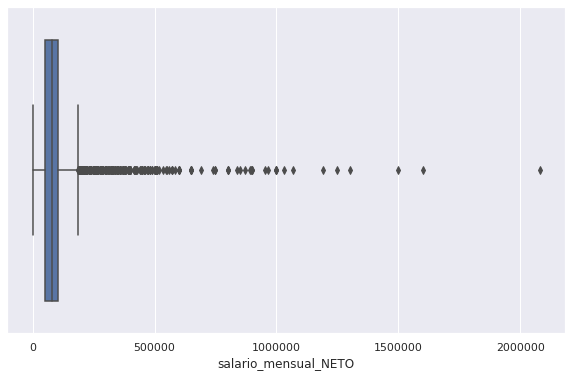

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x=df["salario_mensual_NETO"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

3) Creacion del nuevo dataset con valores filtrados

In [ ]:
df_filtrado2 = df[(df["salario_mensual_NETO"] < 500000) & (df["salario_mensual_NETO"] > 17000)] # 6095-5583 = 512 filas eliminadas (8.4%).